Lets say we want to use the KNN as a classifier. What parameters should we choose? 
- How many of the neighbours are optimal ?
- What distance metric should be used ? (Euclidean, Manhathan, Minikowski)
- What weight funciton should be used ?

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



# Grid search

In [4]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param_dict = { 
    "leaf_size": list(range(1,50,5)),
    "n_neighbors": list(range(2,30,5)),
    "p": [1,2,3]
}

grid = GridSearchCV(model, param_dict, cv=3, verbose=1, n_jobs=-1)
best_model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   19.6s finished


In [5]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 3,
 'weights': 'uniform'}

In [6]:
neigh = best_model.best_estimator_
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9600912200684151
0.9778481012658228
0.8565573770491803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       755
           1       1.00      0.71      0.83       122

    accuracy                           0.96       877
   macro avg       0.98      0.86      0.90       877
weighted avg       0.96      0.96      0.96       877



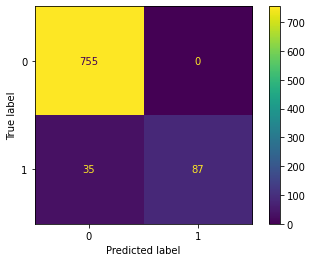

In [7]:
plot_confusion_matrix(neigh, X_test, y_test)